In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib import colors

## 3b

In [46]:
# STARTER CODE
# load data, make sure ‘fisheriris.mat‘ is in your working directory
data = scipy.io.loadmat("fisheriris.mat")
X = data["meas"]
y_text = data["species"]
############################
# YOUR CODE BELOW
# Process and assign numerical values to
# ‘y‘ according to your (a), make sure ‘y‘ is a 1d numpy array.
flower_dict = {np.unique(y_text)[i][0]:i-1 for i in range(0,3)}

# My Response: Set first flower type to -1, second to 0, third to 1
y_num = np.array([flower_dict[y_text[i][0][0]] for i in range(0, y_text.shape[0])])

# Compute the least squares weights
def get_weights(X, labels):
    XtX_inv = np.linalg.inv(np.matmul(X.T, X)) # (X^T X)^-1
    XtX_inv_Xt = np.matmul(XtX_inv, X.T) # (X^T X)^-1 X^T
    weights = np.dot(XtX_inv_Xt, labels) # (X^T X)^-1 X^T y
    return weights

w = get_weights(X, y_num)

# Compute the residuals
y_hat_real = X@w
r = y_num - y_hat_real


# Make a plot (hw said code output works fine)
print("For the residual to be orthogonal to X's columns, the following must be equal to 0")
print("(Note, float rounding in numpy may make this close)")
for i in range(0, X.shape[1]):
    print(f"Dot Product of column {i+1} of X and residual vector: {np.dot(X[:,i], r)}")


For the residual to be orthogonal to X's columns, the following must be equal to 0
(Note, float rounding in numpy may make this close)
Dot Product of column 1 of X and residual vector: -6.360023618867672e-12
Dot Product of column 2 of X and residual vector: -3.403721748895805e-12
Dot Product of column 3 of X and residual vector: -4.841238521180458e-12
Dot Product of column 4 of X and residual vector: -1.4932499681208355e-12


## 3c

In [95]:
data = scipy.io.loadmat("fisheriris.mat")
X = data["meas"]
y_text = data["species"]
############################
# YOUR CODE BELOW
# Process and assign numerical values to
# ‘y‘ according to your (a), make sure ‘y‘ is a 1d numpy array.
flower_dict = {np.unique(y_text)[i][0]:i-1 for i in range(0,3)}

# My Response: Set first flower type to -1, second to 0, third to 1
y = np.array([flower_dict[y_text[i][0][0]] for i in range(0, y_text.shape[0])])

# number of random trials
N = 10_000
# array to store errors
errs = np.zeros(N)
# size of training set
num_train = 40
for i in np.arange(N):
# initialize 0-length arrays for the train and holdout indices. These
# arrays will be filled in the inner loop.
    idx_train = np.zeros(0, dtype=np.intp)
    idx_holdout = np.zeros(0, dtype=np.intp)

    # There are 3 label types and 50 samples of each type
    for label_type in range(3):
        # Choose a random ordering of the 50 samples
        r = np.random.permutation(50)
        # Add the first num_train indices of the random ordering to
        # the idx_train array
        idx_train = np.concatenate((idx_train, 50 * label_type + r[:num_train]))
        # Add the rest of the indices to the idx_holdout array
        idx_holdout = np.concatenate((idx_holdout, 50 * label_type + r[num_train:]))

    # divide data and labels into the train and holdout sets
    Xt = X[idx_train]
    yt = y[idx_train]
    Xh = X[idx_holdout]
    yh = y[idx_holdout]
    ########################
    # YOUR CODE BELOW
    # Solve for the LS weights
    w = get_weights(Xt, yt)

    # Make predictions using the LS weights
    y_hat_holdout_real = Xh@w

    # Turn the real-valued predictions into class labels
    def get_pred_label(x): #based on my 3a answer
        if x <= -0.5:
            return -1
        elif x < 0.5:
            return 0
        else:
            return 1
        
    y_hat_holdout_labels = np.array([get_pred_label(y_hat_holdout_real[i]) for i in range(0, yh.shape[0])])

    # Compute the errors
    errs[i] = np.where(y_hat_holdout_labels == yh, 0, 1).sum()

test_errs = errs / 30

print(f"Average Test Error for {N} iterations: {test_errs.mean()}")


Average Test Error for 10000 iterations: 0.032473333333333326


## 3d

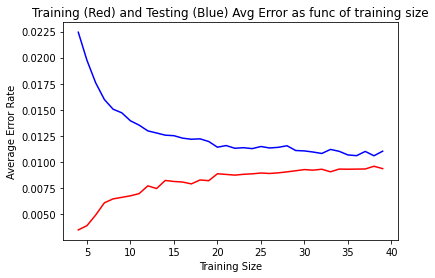

In [96]:
data = scipy.io.loadmat("fisheriris.mat")
X = data["meas"]
y_text = data["species"]
############################
# YOUR CODE BELOW
# Process and assign numerical values to
# ‘y‘ according to your (a), make sure ‘y‘ is a 1d numpy array.
flower_dict = {np.unique(y_text)[i][0]:i-1 for i in range(0,3)}

# My Response: Set first flower type to -1, second to 0, third to 1
y = np.array([flower_dict[y_text[i][0][0]] for i in range(0, y_text.shape[0])])
############################
# YOUR CODE BELOW
# Process and assign numerical values to
# ‘y‘ according to your (a), make sure ‘y‘ is a 1d numpy array.
# If dimensions are mismatching, you may find ‘y = y.flatten()‘ useful.
# number of random trials
N = 1_000
# Min / Max size of the training set
min_num_train = 4
max_num_train = 40
# Arrays to store error rates
train_errs = np.zeros((max_num_train-min_num_train, N))
test_errs = np.zeros((max_num_train-min_num_train, N))
n_train_vals = np.arange(min_num_train, max_num_train)
for j, n_train in enumerate(n_train_vals):
    for i in np.arange(N):
        # initialize 0-length arrays for the train and holdout indices.
        # These arrays will be filled in the inner loop.
        idx_train = np.zeros(0, dtype=np.intp)
        idx_holdout = np.zeros(0, dtype=np.intp)
        # There are 3 label types and 50 samples of each type
        for label_type in range(3):
            # Choose a random ordering of the 50 samples
            r = np.random.permutation(50)
            # Add the first num_train indices of the random ordering to
            # the idx_train array
            idx_train = np.concatenate((idx_train, 50 * label_type + r[:n_train]))
            # Add the rest of the indices to the idx_holdout array
            idx_holdout = np.concatenate((idx_holdout, 50 * label_type + r[n_train:]))

        # divide data and labels into the train and holdout sets
        Xt = X[idx_train]
        yt = y[idx_train]
        Xh = X[idx_holdout]
        yh = y[idx_holdout]
        ########################
        # YOUR CODE BELOW
        w = get_weights(Xt, yt)

        y_hat_training_real = Xt@w
        y_hat_training_labels = np.array([get_pred_label(y_hat_training_real[i]) for i in range(0, yt.shape[0])])
        train_errs[j,i] = np.where(y_hat_training_labels == yt, 0, 1).sum() / (yt.shape[0]*3)


        y_hat_holdout_real = Xh@w
        y_hat_holdout_labels = np.array([get_pred_label(y_hat_holdout_real[i]) for i in range(0, yh.shape[0])])
        test_errs[j,i] = np.where(y_hat_holdout_labels == yh, 0, 1).sum() / (yh.shape[0]*3)

###################
# YOUR CODE BELOW
# Make a plot of the train and test errors as a function of
# training set size


plt.figure(1)
plt.plot(n_train_vals, train_errs.mean(axis=1), c="red")
plt.plot(n_train_vals, test_errs.mean(axis=1), c="blue")
plt.xlabel('Training Size')
plt.ylabel('Average Error Rate')
plt.title('Training (Red) and Testing (Blue) Avg Error as func of training size')
plt.show()


In [97]:
data = scipy.io.loadmat("fisheriris.mat")
X = data["meas"]
y_text = data["species"]

flower_dict = {np.unique(y_text)[i][0]:i-1 for i in range(0,3)}
y = np.array([flower_dict[y_text[i][0][0]] for i in range(0, y_text.shape[0])])

N = 10_000
errs = np.zeros(N)
num_train = 40

X_lengths = X[:,[0, 2]]

for i in np.arange(N):
# initialize 0-length arrays for the train and holdout indices. These
# arrays will be filled in the inner loop.
    idx_train = np.zeros(0, dtype=np.intp)
    idx_holdout = np.zeros(0, dtype=np.intp)

    for label_type in range(3):
        # Choose a random ordering of the 50 samples
        r = np.random.permutation(50)
        # Add the first num_train indices of the random ordering to
        # the idx_train array
        idx_train = np.concatenate((idx_train, 50 * label_type + r[:num_train]))
        # Add the rest of the indices to the idx_holdout array
        idx_holdout = np.concatenate((idx_holdout, 50 * label_type + r[num_train:]))

    # divide data and labels into the train and holdout sets
    Xt = X_lengths[idx_train]
    yt = y[idx_train]
    Xh = X_lengths[idx_holdout]
    yh = y[idx_holdout]
    ########################
    # YOUR CODE BELOW
    # Solve for the LS weights
    w = get_weights(Xt, yt)

    # Make predictions using the LS weights
    y_hat_holdout_real = Xh@w

    # Turn the real-valued predictions into class labels
    def get_pred_label(x): #based on my 3a answer
        if x <= -0.5:
            return -1
        elif x < 0.5:
            return 0
        else:
            return 1
        
    y_hat_holdout_labels = np.array([get_pred_label(y_hat_holdout_real[i]) for i in range(0, yh.shape[0])])

    # Compute the errors
    errs[i] = np.where(y_hat_holdout_labels == yh, 0, 1).sum()

test_errs = errs / 30

print(f"Average Test Error for only lengths for {N} iterations: {test_errs.mean()}")

Average Test Error for only lengths for 10000 iterations: 0.05654
